In [59]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [64]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

id 고유 id <br>
hour 시간<br>
temperature 기온<br>
precipitation 비가 오지 않았으면 0, 비가 오면 1<br>
windspeed 풍속(평균)<br>
humidity 습도<br>
visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)<br>
ozone 오존<br>
pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)<br>
pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)<br>
count 시간에 따른 따릉이 대여 수<br>

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [66]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [67]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [68]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [75]:
# train.fillna(0, inplace = True)
train.fillna(train.mean(), inplace = True)
test.fillna(test.mean(), inplace = True)

In [77]:
train.isnull().sum()
test.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

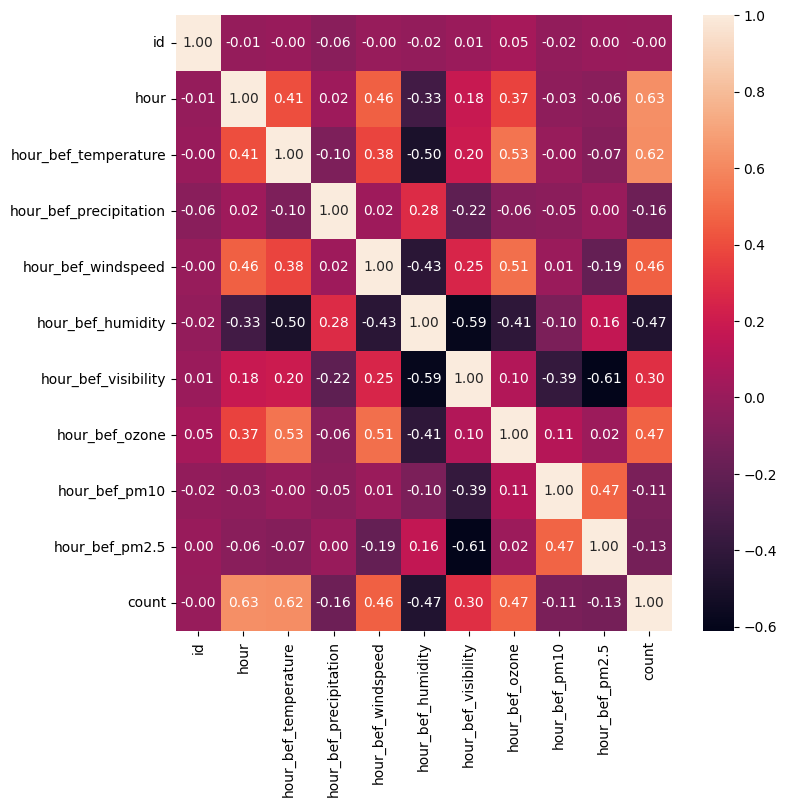

In [78]:
plt.figure(figsize = (8,8))
sns.heatmap(train.corr(), annot = True, fmt=".2f")
plt.show()

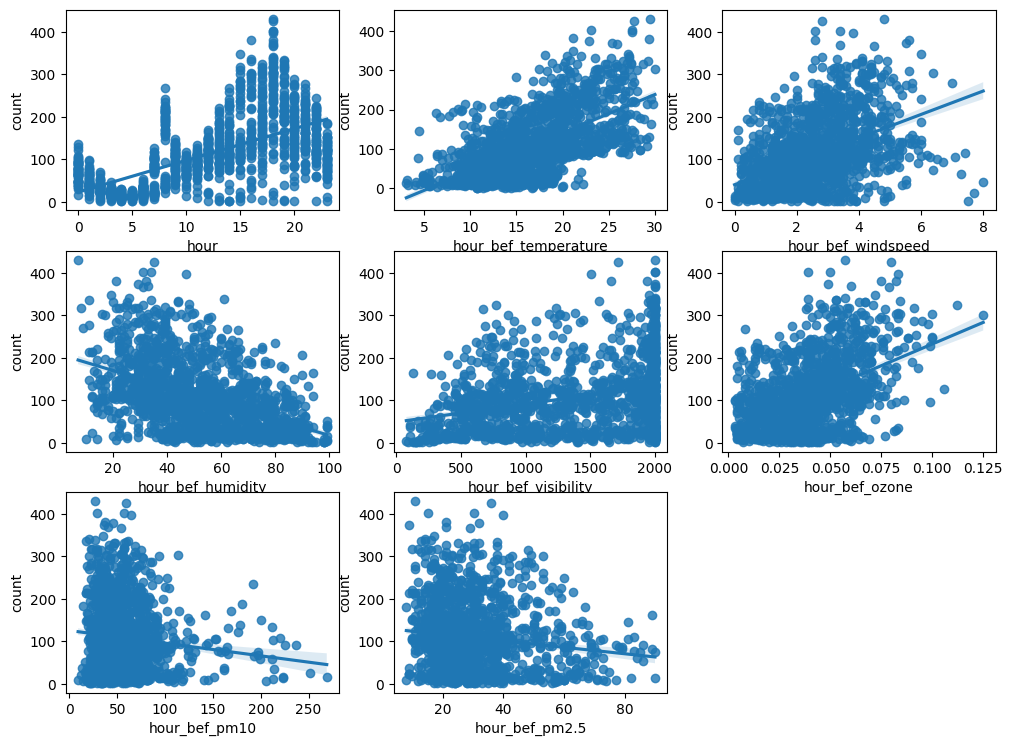

In [84]:
cols = ['hour', 'hour_bef_temperature',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']

# for col in cols:
#     plt.figure(figsize = (3,3))
#     sns.regplot(x = col, y = 'count', data = train)
#     plt.show
    

plt.figure(figsize = (12, 12))
for i, col in enumerate(cols):
    ax = plt.subplot(4, 3, i+1)
    sns.regplot(x = col, y = 'count', data = train)
    plt.show

cols = ['hour', 'hour_bef_temperature',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']

# 시간대 별 대여 수

In [7]:
np.sort(train['hour'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [8]:
hourly_average = train.groupby(['hour'])['count'].mean()
hourly_average

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

In [9]:
train['count'].sum()

158394.0

In [10]:
hourly_average.sum()

2608.374863387978

In [11]:
top3 = hourly_average.nlargest(3)
top3

hour
18    262.163934
19    201.606557
17    187.133333
Name: count, dtype: float64

In [12]:
top3.sum()/hourly_average.sum() * 100

24.95438191315657

In [13]:
top6 = hourly_average.nlargest(6)

next_top3 = top6.iloc[3:6]
next_top3

hour
16    169.100000
21    168.816667
20    164.868852
Name: count, dtype: float64

In [14]:
next_top3.sum() / hourly_average.sum() * 100

19.275815228207748

### 시각화

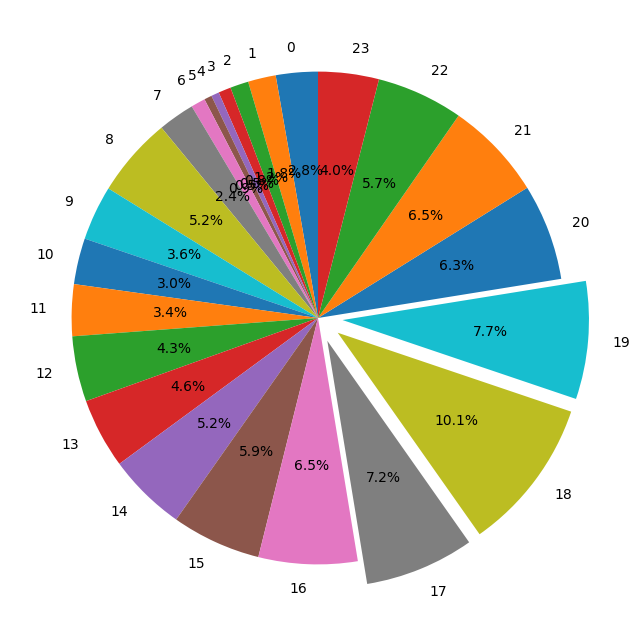

In [15]:
# 각 시간대에 대한 explode 값 설정
explode = [0.1 if hour in top3 else 0 for hour in hourly_average.index]

# 파이 차트 생성
plt.figure(figsize=(10, 8))
plt.pie(hourly_average, labels=hourly_average.index, autopct='%1.1f%%', startangle=90, explode=explode)
plt.show()

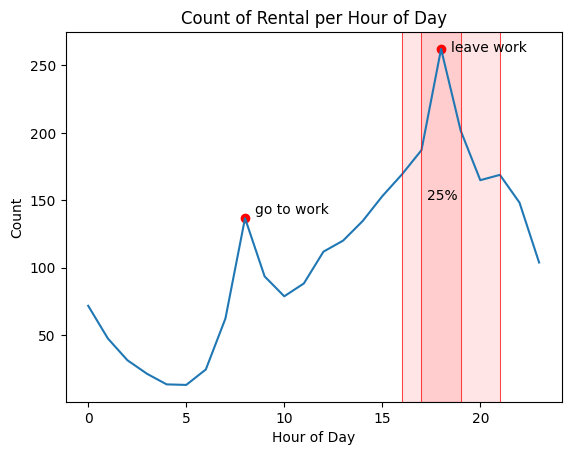

In [16]:
hourly_average.plot()

plt.axvline(x = 17, color = 'r', linewidth = 0.5)
plt.axvline(x = 19, color = 'r', linewidth = 0.5)
plt.axvspan(17, 19, color = 'r', alpha = 0.1)

plt.axvline(x = 16, color = 'r', linewidth = 0.5)
plt.axvline(x = 21, color = 'r', linewidth = 0.5)
plt.axvspan(16, 21, color = 'r', alpha = 0.1)

plt.scatter([8, 18], [hourly_average.loc[8], hourly_average.loc[18]], color='red')  # 출근 시간과 퇴근 시간에 점 표시
plt.text(8.5, 140, 'go to work')
plt.text(18.5, 260, 'leave work')
plt.text(17.3, 150, '25%')

# 추가 설정
plt.title('Count of Rental per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

# 그래프 표시
plt.show()


### 결론

- 17 - 19시 사용량이 전체 사용량의 25% 가량 차지함: 하교 및 퇴근의 영향 가능성
- 평균 하교 및 퇴근 시간대 전후 16, 20, 21시 사용량이 전체 사용량의 19% 가량 차지함
- 기타 오전 7시 대비 8시 2.8% 급증  (등교 및 출근 영향 추정)

# 미세먼지 수준 별 대여 수

미세먼지 농도 범위를 정의하기

- Good (좋음): 미세먼지 농도가 0 ~ 30 μg/m³
- Not Good (보통): 미세먼지 농도가 31 ~ 80 μg/m³
- Bad (나쁨): 미세먼지 농도가 81 ~ 150 μg/m³
- Very Bad (매우 나쁨): 미세먼지 농도가 151 μg/m³ 이상

In [17]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


count    1459.000000
mean       53.642221
std        33.710370
min         0.000000
25%        33.000000
50%        49.000000
75%        68.000000
max       269.000000
Name: hour_bef_pm10, dtype: float64


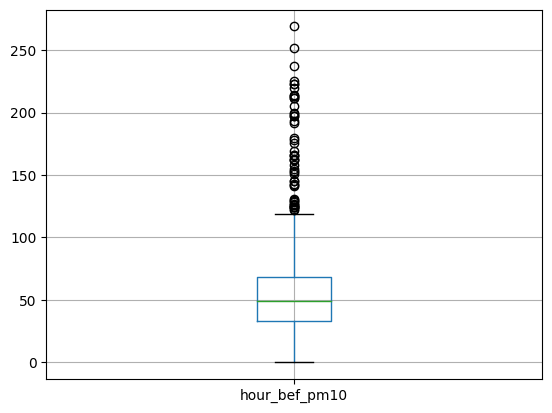

count    1459.000000
mean       27.895134
std        16.339987
min         0.000000
25%        19.000000
50%        25.000000
75%        36.000000
max        90.000000
Name: hour_bef_pm2.5, dtype: float64


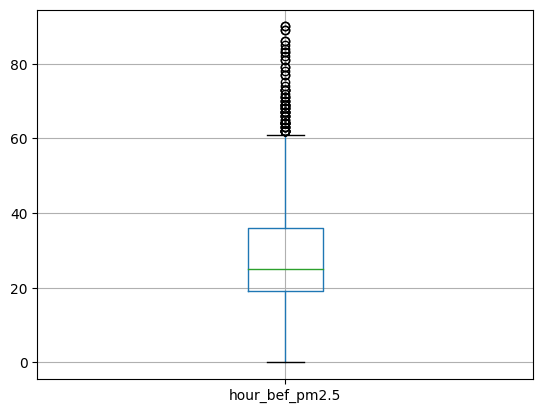

In [19]:
pm_col = ['hour_bef_pm10', 'hour_bef_pm2.5']

for pm in pm_col:
    print(train[pm].describe())
    train.boxplot(column = [pm])
    plt.show()

In [29]:
for pm in pm_col:
    train[pm] = train[pm].apply(lambda x: 
                                'very bad' if x >= 71
                                else 'bad' if x >= 31
                                else 'not bad' if x >= 16 
                                else 'good')

In [30]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,very bad,bad,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,very bad,bad,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,bad,not bad,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,very bad,bad,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,not bad,good,431.0


In [48]:
pm_order = ['good', 'not bad', 'bad', 'very bad']

pm2_counts = train.groupby(['hour_bef_pm2.5'])['count'].sum().reindex(pm_order, fill_value = 0)
pm2df = pd.DataFrame({ 'level': pm2_counts.index,
                     'count': pm2_counts.values})

pm10_counts = train.groupby(['hour_bef_pm10'])['count'].sum().reindex(pm_order, fill_value = 0)
pm10df = pd.DataFrame({ 'level': pm10_counts.index,
                     'count': pm10_counts.values})

In [49]:
train.groupby(['hour_bef_pm10'])['count'].sum().sort_values(ascending = False)

hour_bef_pm10
bad         97006.0
very bad    31406.0
not bad     22402.0
good         7580.0
Name: count, dtype: float64

In [50]:
train.groupby(['hour_bef_pm2.5'])['count'].sum().sort_values(ascending = False)

hour_bef_pm2.5
not bad     79093.0
bad         51455.0
good        25970.0
very bad     1876.0
Name: count, dtype: float64

### 결론

- 미세먼지 pm10 기준, 공기의 질이 나쁠수록 (Bad -> Very Bad) 자전거 대여 수가 급격히 감소하는 경향성.
- 초미세먼지 pm2.5 기준, 공기의 질이 나쁠수록 (Not Bad -> Bad -> Very Bad) 자전거 대여 수가 급격히 감소하는 경향성.
    - 초미세먼지 수준이 보통 (Not bad)일 때 가장 많은 대여 발생
<br>


- 미세먼지 농도와 자전거 대여 수 간에는 일정한 상관관계가 있을 수 있음.
- 특히 공기 질이 매우 나쁠 때 두드러지는 대여 수의 감소.
    - 그러나 공기 질이 중간 수준일 때 자전거 대여가 활발히 이루어질 수 있으므로, 미세먼지 농도가 자전거 대여에 "극적인" 영향을 미친다고 단정하기는 어려움.
    - 상황에 따라 영향력의 정도가 다를 수 있으며, 추가적인 데이터 분석과 다른 환경적, 계절적 요인 고려 필요.


# 기온 별 자전거 대여 수

In [86]:
train.groupby(['hour_bef_temperature'])['count'].sum()

hour_bef_temperature
3.1      14.0
3.2      21.0
3.3       7.0
4.0       8.0
4.2      16.0
        ...  
29.4    130.0
29.5    431.0
29.6    391.0
29.8    215.0
30.0    304.0
Name: count, Length: 246, dtype: float64

In [90]:
train['temp_int'] = train['hour_bef_temperature'].astype(int)
train.groupby(['temp_int'])['count'].sum()

temp_int
3        42.0
4       361.0
5       211.0
6       638.0
7       777.0
8      1269.0
9      2806.0
10     4077.0
11     4373.0
12     5593.0
13     6138.0
14     7912.0
15     8961.0
16     8110.0
17     9583.0
18    12843.0
19    14896.0
20    12622.0
21     9387.0
22     8533.0
23     9010.0
24     5052.0
25     7365.0
26     6707.0
27     6781.0
28     1727.0
29     2316.0
30      304.0
Name: count, dtype: float64

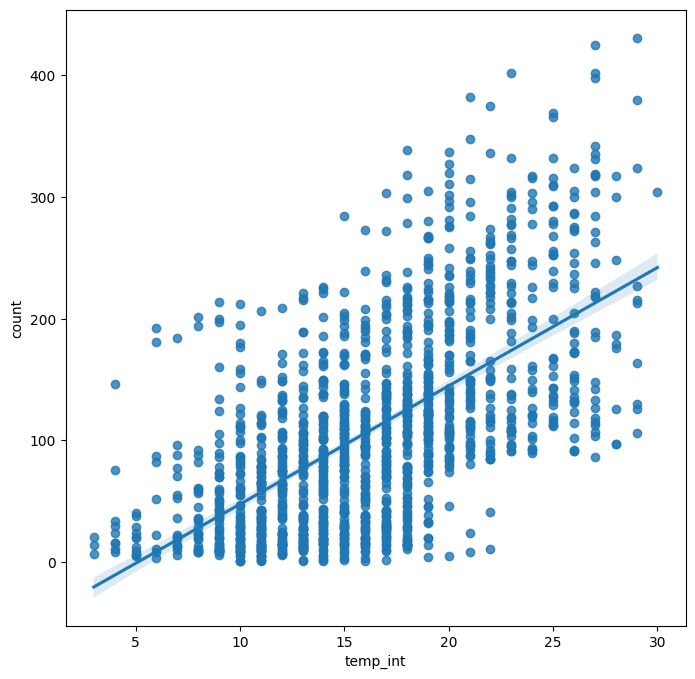

In [91]:
plt.figure(figsize = (8, 8))
sns.regplot(x = 'temp_int', y = 'count', data = train)
plt.show()

In [92]:
temp = train.groupby(['temp_int'])['count'].sum()

In [97]:
goodtemp3 = temp.nlargest(3)
goodtemp3

temp_int
19    14896.0
18    12843.0
20    12622.0
Name: count, dtype: float64

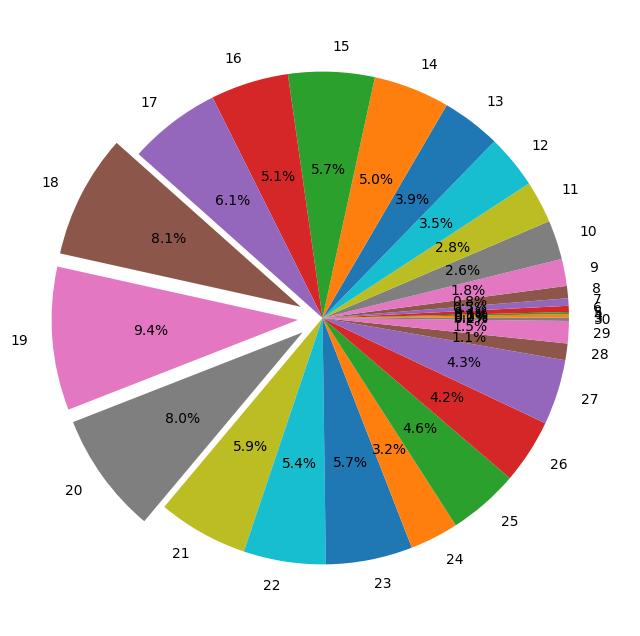

In [98]:
explode = [0.1 if temp in goodtemp3 else 0 for temp in temp.index]

plt.figure(figsize = (10,8))
plt.pie(temp, labels = temp.index, autopct = '%1.1f%%', explode = explode)
plt.show()

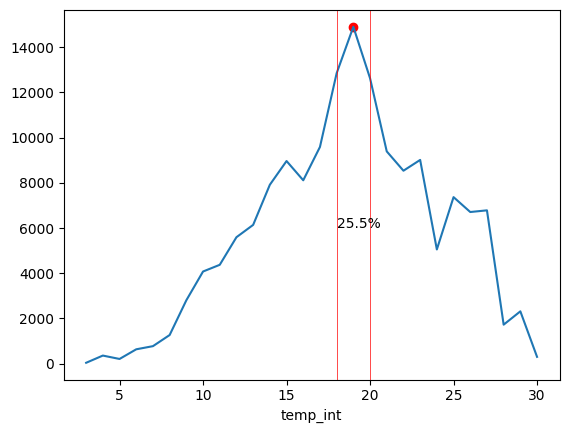

In [100]:
temp.plot()
plt.scatter([19], [temp.loc[19]], color = 'r')
plt.axvline(x = 18, color = 'r', linewidth = 0.5)
plt.axvline(x = 20, color = 'r', linewidth = 0.5)
plt.text(18, 6000, '25.5%')
plt.show()

### 결론

- 기온이 17도 이상 23% 이하일 때 가장 많은 대여를 확인할 수 있고, 기온이 18 - 20도 사이일 떄 약 25.5%의 대여를 확인할 수 있다.

# 예측

In [118]:
submission = pd.read_csv('submission.csv')

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [107]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,temp_int
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0,16
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0,20
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0,13
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0,8
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0,29


In [108]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [123]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone']

# X_train= train.drop(['count'], axis = 1)
X_train = train[features]
y_train = train['count']

X_test = test[features]

## rf

In [124]:
# 베이스라인
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
submission['count'] = y_pred
submission.to_csv('baseline.csv', index = False)

In [126]:
#파라미터 튜닝
params = {'min_samples_split': range(2,5),
         'max_depth': range(8,12,2),
         'n_estimators': range(250,450,50)}

gs = GridSearchCV(estimator = rf, param_grid = params, scoring = 'neg_mean_squared_error', cv = 3)
gs.fit(X_train, y_train)

print('Best parameters:', gs.best_params_)
print("Best cross-validation score: {:.2f}".format(-gs.best_score_))


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 250}
Best cross-validation score: 1721.94


In [127]:
rf_gs_pred = gs.predict(X_test)
submission['count'] = rf_gs_pred
submission.to_csv('rf_gs.csv', index=False)

## dt

In [129]:
dt = DecisionTreeRegressor()

params = {'max_depth': range(2, 8),
         'min_samples_leaf': range(5, 20, 5)}

gs = GridSearchCV(estimator = dt, param_grid = params, scoring = 'neg_mean_squared_error', cv = 3)
gs.fit(X_train, y_train)
print('Best parameters : ', gs.best_params_)
print('Best scores : {:.2f}'.format(-gs.best_score_))

Best parameters :  {'max_depth': 6, 'min_samples_leaf': 10}
Best scores : 2166.41


In [130]:
dt_gs_pred = gs.predict(X_test)
submission['count'] = dt_gs_pred
submission.to_csv('dt_gs.csv', index = False)

## gb

In [132]:
gb = GradientBoostingRegressor()

params = {'n_estimators': range(100, 250, 50),
         'learning_rate': [0.01, 0.1, 0.2],
         'max_depth': range(1,11,2)
         }

gs = GridSearchCV(estimator = gb, param_grid = params, scoring = 'neg_mean_squared_error', cv = 3)
gs.fit(X_train, y_train)
print("Best Parameter: ", gs.best_params_)
print("Best Score: {:.2f}".format(-gs.best_score_))

Best Parameter:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 1806.66


In [133]:
gb_gs_pred = gs.predict(X_test)
submission['count'] = gb_gs_pred
submission.to_csv('gb_gs.csv', index=False)

In [110]:
# models = {
#         'Random Forest': RandomForestRegressor(),
#          'Decision Tree': DecisionTreeRegressor(),
#          'Gradient Boosting': GradientBoostingRegressor()
#          }

# for model_name, model in models:
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     submission['count'] = y_pred
#     submission.to_csv('', index = False)


# tune parameters
# def tuning_params(X, y, params, model):
#     gs_acc = GridSearchCV(model, params, scoring = 'accuracy', cv = 5, n_jobs = -1)
#     gs_auc = GridSearchCV(model, params, scoring = 'roc_auc', cv = 5, n_jobs = -1)
    
#     gs_acc.fit(X, y)
#     gs_auc.fit(X, y)
    
#     print('Accuracy')
#     print('Train score:', gs_acc.score(X_train, y_train))
#     print('Best params:', gs_acc.best_params_)
#     print("Best estimator: ", gs_acc.best_estimator_)
#     print("Best score: ", gs_acc.best_score_)
    
#     print('\nROC_AUC')
#     print('Train score:', gs_auc.score(X_train, y_train))
#     print('Best params:', gs_auc.best_params_)
#     print("Best estimator: ", gs_auc.best_estimator_)
#     print("Best score: ", gs_auc.best_score_)
    
#     return gs_acc.best_estimator_, gs_auc.best_estimator_